In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from sklearn.metrics import r2_score
from scipy.stats import pearsonr, spearmanr
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.patches as mpatches
from scipy.stats import ttest_ind, ttest_1samp, ttest_rel
import matplotlib as mpl

In [61]:
# mpl.rcParams['font.family'] = 'Avenir'
plt.rc('font', family='Helvetica')
plt.rcParams['font.size'] = 18
plt.rcParams['axes.linewidth'] = 2
plt.rcParams['figure.figsize'] = (10.0, 7.0)
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
sns.set_palette("Dark2")

# load data

## RF

In [8]:
wes_df = pd.read_csv("../work_dirs/wes/RandomForest/scores_202006141905_ruv_min_300.csv")
wes_df['data'] = 'WES'
print(wes_df['test_corr'].median())
cna_df = pd.read_csv("../work_dirs/cna/RandomForest/scores_202006141906_ruv_min_300.csv")
cna_df['data'] = 'Copy Number'
print(cna_df['test_corr'].median())
methy_df = pd.read_csv("../work_dirs/methylation/RandomForest/scores_202006141906_ruv_min_300.csv")
methy_df['data'] = 'Methylation'
print(methy_df['test_corr'].median())
rna_df = pd.read_csv("../work_dirs/rna/RandomForest/scores_202006051532_rna_300.csv")
rna_df['data'] = 'Transcriptome'
print(rna_df['test_corr'].median())
protein_df = pd.read_csv("../work_dirs/protein/RandomForest/scores_202006051013_ruv_min_300.csv")
protein_df['data'] = 'Proteome'
print(protein_df['test_corr'].median())

0.0875122716773224
0.32779550672540586
0.501115026210122
0.514560473792317
0.5086176615413597


In [9]:
print(wes_df['val_score'].median())
print(cna_df['val_score'].median())
print(methy_df['val_score'].median())
print(rna_df['val_score'].median())
print(protein_df['val_score'].median())

0.08995889694433727
0.2852420074228085
0.460952024794331
0.4890245065274498
0.4966411863935299


In [52]:
data = {
    'WES': wes_df['test_corr'].values,
    'Copy Number': cna_df['test_corr'].values,
    'Methylation': methy_df['test_corr'].values,
    'Transcriptome': rna_df['test_corr'].values,
    'Proteome': protein_df['test_corr'].values
}
data_list = list(data.keys())

## DL

In [55]:
def multidrug_score(scores_multi):
    scores_multi_test = scores_multi[
    scores_multi['run'] == 'test'].reset_index(drop=True)

    max_epoch = scores_multi_test.groupby(
        ['epoch']).median()['corr'].reset_index()

    print(max_epoch[max_epoch['corr'] == max_epoch['corr'].max()])
    cv_max_epoches = []
    cv_max_epoches_scores = []
    for i in range(5):
        scores_multi_cv = scores_multi[
            scores_multi['run'] == f'cv_{i}'].reset_index(drop=True)

        max_epoch = scores_multi_cv.groupby(
            ['epoch']).median()['corr'].reset_index()
        cv_max_epoches_scores.append(max_epoch['corr'].max())
        max_epoch = np.squeeze(
            max_epoch[max_epoch['corr'] == max_epoch['corr'].max()]['epoch'])
        cv_max_epoches.append(max_epoch)
    print(cv_max_epoches)
    print(np.average(cv_max_epoches_scores))
    cv_epoch = int(np.mean(cv_max_epoches))
    print(f"cv eooch {cv_epoch}")
    scores_multi_cv = scores_multi[
        (scores_multi['run'] != 'test')
        & (scores_multi['epoch'] == cv_epoch)].drop(
            ['epoch'], axis=1).reset_index(drop=True)
    print(
        scores_multi_cv.groupby(['drug_id']).mean()['corr'].median())

In [56]:
scores_multi_wes = pd.read_csv(
    "../work_dirs/wes/MultiDrug/scores_202006151420_res.csv")
multidrug_score(scores_multi_wes)

     epoch      corr
200    201  0.144035
[169, 240, 98, 87, 232]
0.14676744875062392
cv eooch 165
0.12397161876820084


In [57]:
scores_multi_cna = pd.read_csv(
    "../work_dirs/cna/MultiDrug/scores_202006151421_res.csv")
multidrug_score(scores_multi_cna)

     epoch      corr
257    258  0.370826
[291, 231, 282, 243, 296]
0.32907219354467687
cv eooch 268
0.31349009067115147


In [58]:
scores_multi_methylation = pd.read_csv(
    "../work_dirs/methylation/MultiDrug/scores_202006151635_res.csv")
multidrug_score(scores_multi_methylation)

     epoch      corr
283    284  0.475651
[291, 246, 299, 297, 300]
0.4198770600156051
cv eooch 286
0.41392129819143986


# pairwise correlation

In [17]:
for i in range(len(data_list)):
    for j in range(i+1, len(data_list)):
        print(
            f"{data_list[i]}/{data_list[j]} R: {pearsonr(data[data_list[i]], data[data_list[j]])[0]:.4f}/{spearmanr(data[data_list[i]], data[data_list[j]])[0]:.4f}"
        )

WES/Copy Number R: 0.3742/0.3458
WES/Methylation R: 0.3097/0.3057
WES/Transcriptome R: 0.3241/0.3038
WES/Proteome R: 0.3143/0.2986
Copy Number/Methylation R: 0.7641/0.7704
Copy Number/Transcriptome R: 0.7869/0.7950
Copy Number/Proteome R: 0.8060/0.8176
Methylation/Transcriptome R: 0.9380/0.9384
Methylation/Proteome R: 0.8927/0.8938
Transcriptome/Proteome R: 0.9244/0.9299


# box plot

In [18]:
single_omic = pd.concat([wes_df, cna_df, methy_df, rna_df, protein_df])

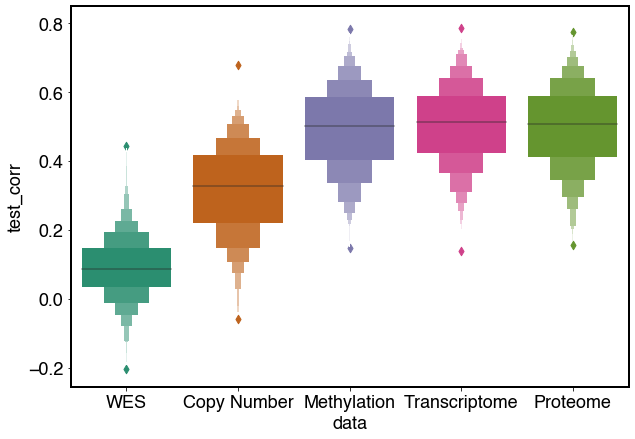

In [21]:
sns.boxenplot('data', 'test_corr', data=single_omic, orient='v', linewidth=2)

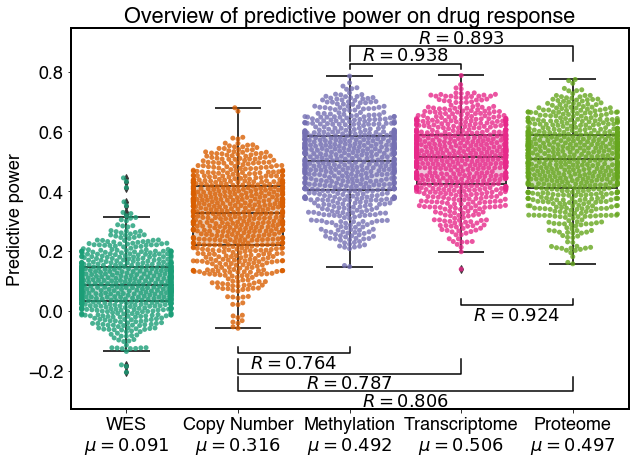

In [66]:
ga = sns.boxplot('data',
                 'test_corr',
                 data=single_omic,
                 orient='v',
                 linewidth=2)
for patch in ga.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .3))

sns.swarmplot('data', 'test_corr', data=single_omic, orient='vh', alpha=.8)

x1, x2 = 2, 3  # columns 'Sat' and 'Sun' (first column: 0, see plt.xticks())
y, w, col = single_omic['test_corr'].max() + 0.02, 0.02, 'k'
plt.plot([x1, x1, x2, x2], [y, y + w, y + w, y], lw=1.5, c=col)
plt.text((x1 + x2) * .5,
         y + w + 0.025,
         r"$R=0.938}$",
         ha='center',
         va='center',
         color=col)

x1, x2 = 2, 4  # columns 'Sat' and 'Sun' (first column: 0, see plt.xticks())
y, w, col = single_omic['test_corr'].max() + 0.05, 0.05, 'k'
plt.plot([x1, x1, x2, x2], [y, y + w, y + w, y], lw=1.5, c=col)
plt.text((x1 + x2) * .5,
         y + w + 0.025,
         r"$R=0.893$",
         ha='center',
         va='center',
         color=col)

x1, x2 = 1, 2  # columns 'Sat' and 'Sun' (first column: 0, see plt.xticks())
y, w, col = -0.1 - 0.02, 0.02, 'k'
plt.plot([x1, x1, x2, x2], [y, y - w, y - w, y], lw=1.5, c=col)
plt.text((x1 + x2) * .5,
         y - w - 0.035,
         r"$R=0.764}$",
         ha='center',
         va='center',
         color=col)
x1, x2 = 1, 3  # columns 'Sat' and 'Sun' (first column: 0, see plt.xticks())
y, w, col = -0.1 - 0.06, 0.05, 'k'
plt.plot([x1, x1, x2, x2], [y, y - w, y - w, y], lw=1.5, c=col)
plt.text((x1 + x2) * .5,
         y - w - 0.035,
         r"$R=0.787}$",
         ha='center',
         va='center',
         color=col)
x1, x2 = 1, 4  # columns 'Sat' and 'Sun' (first column: 0, see plt.xticks())
y, w, col = -0.1 - 0.12, 0.05, 'k'
plt.plot([x1, x1, x2, x2], [y, y - w, y - w, y], lw=1.5, c=col)
plt.text((x1 + x2) * .5,
         y - w - 0.035,
         r"$R=0.806}$",
         ha='center',
         va='center',
         color=col)

x1, x2 = 3, 4  # columns 'Sat' and 'Sun' (first column: 0, see plt.xticks())
y, w, col = 0.1 - 0.06, 0.02, 'k'
plt.plot([x1, x1, x2, x2], [y, y - w, y - w, y], lw=1.5, c=col)
plt.text((x1 + x2) * .5,
         y - w - 0.035,
         r"$R=0.924}$",
         ha='center',
         va='center',
         color=col)

for i in range(len(data_list)):
    plt.text(
        i,
        -0.45,
        f"$\mu={single_omic[single_omic['data']==data_list[i]]['test_corr'].mean():.3f}$",
        ha='center',
        va='center')

plt.ylabel("Predictive power")
plt.xlabel("")
plt.title("Overview of predictive power on drug response")
plt.savefig("../plots/Fig4A.pdf", dpi=500)